# News Classification Without Pretrained Model

## Library Installs and Imports

We will need several libraries to get started. Each should be installed and upgraded to ensure it works. This notebook was created in February 2020 and should work with the following major verisons:

- Fast.ai version 2.x
- Fastcore version: 1.x
- Pandas version: 1.x
- Numpy version: 1.x

In [1]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq pandas==1.1.0

     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 45.2MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 10.5MB 8.3MB/s 


In [2]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.2.7
Fastcore version: 1.3.19


In [3]:
from fastai.text.all import *
from fastai.callback.progress import CSVLogger
import pandas as pd
import numpy as np
print('Pandas version:', pd.__version__)
print('numpy version:', np.__version__)

Pandas version: 1.1.5
numpy version: 1.19.5


## Load Dataset

We will be using Google Drive to store our files. Please change the directory for the `cd` command to wherever your notebook is located. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/DataScience/NLP/01_eduge_classification'

/content/drive/MyDrive/DataScience/NLP/01_eduge_classification


Now we can import our dataset. Luckily this dataset is small enough to fit into memory, so we can load it into a Pandas dataframe.

In [6]:
df = pd.read_csv('data/news.csv')

In [7]:
df = df.rename(columns={'news':'text'})

In [8]:
np.random.seed(42)

In [9]:
df['is_valid'] = np.random.choice([0,1], size=len(df), p=[0.8, 0.2])

In [10]:
df.head(2)

,text,label,is_valid
0,"Киноны кадраас «Юрийн галавын үе» кино прокатад тавигдсныхаа дараах эхний амралтын өдрөөр хамгийн их орлого оллоо гэж Business Insider хэвлэл мэдээлэв. Хойд Америкт л гэхэд эхний амралтын өдрүүдэд 204,6 сая доллар цуглуулж чадлаа. Гадаад орнуудын үзүүлэлт нь 307,2 сая ам.доллар байв. Нийт кассын орлого 511,8 сая ам.доллар болжээ. Энэхүү үзүүлэлт нь Universal кино компанийн дээд амжилт төдийгүй дэлхийн кино аж үйлдвэрийн томоохон үсрэлт боллоо. Үүнээс өмнө амралтын эхний өдрүүдэд 500 сая долларын босго давсан их мөнгө цуглуулж байсан түүх байхгүй. «Гарри Поттер ба үхлийн тахил: II хэсэг» 48...",урлаг соёл,0
1,"“Universal” кино компани Жадд Апатоугийн найруулж, “Lonely Island” гэдэг хошин шогийн хамтлагийнхны гол дүрүүдэд нь тоглож байгаа киног 2016 оны зургадугаар сарын 3-нд дэлгэцнээ гаргахаар төлөвлөсөн тухай The Hollywood Reporter мэдээлж байна. Шинэ киноны нэрийг одоохондоо өгөөгүй гэнэ. Кинонд инээдмийн жүжигчид Энди Сэмберг, Йорма Таккоме, Акива Шаффер нар тогложээ. Сүүлийн жилүүдэд гарч ирсэн баримтат киноны элэглэл нь шинэ кино болох ёстой. Энд Жастин Бибер, Кэти Перри нарын элэглэл хамгийн түрүүнд дүрслэгдэх аж. “Lonely Island” хошин шогийн хамтлагийнхан “Saturday Night Live” гэдэгт нэв...",урлаг соёл,1


In [11]:
dblocks = DataBlock(blocks=(TextBlock.from_df('text'), CategoryBlock),
                    get_x=ColReader('text'),
                    get_y=ColReader(1), 
                    splitter=ColSplitter())

In [12]:
dls = dblocks.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [13]:
dls.show_batch()

,text,category
0,"xxbos монгол улсын ерөнхийлөгч цахиагийн элбэгдорж “ news ” агентлагийн урилгыг хүлээн авч , уншигчдын асуултад хариуллаа . морин жилд арван жилийнхээ ойг тэмдэглэсэн мэдээллийн “ news ” агентлаг 2004 - 2014 онд шалгарсан “ оны xxunk цуврал ярилцлага хийж байгаагийн анхны зочин монгол улсын ерөнхийлөгч цахиагийн элбэгдорж боллоо . өмнө нь “ ньюс xxunk монгол улсын ерөнхийлөгчтэй “ xxunk ” гэсэн сонирхолтой ярилцлагыг өрнүүлж , олон түмэндээ хүргэж байсан . энэ удаа бид хоёр өдрийн турш xxunk асуулт авсан бөгөөд уншигчдаас нийт 461 асуулт ирснээс 40 орчмыг багцлан , ерөнхийлөгчид тавьсан юм . ярилцлагыг “ ньюс xxunk ерөнхий редактор xxunk тэмүүлэн хөтлөв . xxunk байгаа морин жил монголчуудад маань хэр ээлтэй байв , таны бодлоор . бидний олсон ололт , алдаа юу байв ? -морин жилүүд монголчуудад ээлтэй байсан . улирч байгаа морин жил маань монгол түмэнд ээлээ өглөө . морин жилдээ монголчууд 3 саяулаа боллоо . амны",улс төр
1,"xxbos с.дэмбэрэл / уих - ын гишүүн , мүхаүт - ын дарга / доорхи өгүүллийг 2009 оны 8 сард бичсэн шиг санагдаж байна . 5 жилийн өмнө . тэр үед эдийн засгийн байдал ихэд хүндэрсэн , одоогийнхтой төстэй олон шинж тэмдгүүд эдийн засагт үүссэн байв . таван жил өнгөрсөн хэдий ч монголын хөгжлийн бодлого , эдийн засгийн өсөлтөнд xxunk өөрчлөлт гарсангүй . өөрөөр хэлбэл монгол улс хөгжлийн бэрхшээлтэй хэвээр байна . хөгжлийн номлол , үзэл баримтлал , түүнд хүрэх бодлогын сэтгэлгээ , эдийн засгийн өсөлтийн бодлогод тодорхой эерэг өөрчлөлтүүд гарсан ч бүхэлдээ xxunk өөрчлөлт гараагүй болохоор эдийн засаг хүндэрсэн үед түүнийг ашиглах жор нь аанай л хуучин хэвээр , танил дүр зураг … том том бүтээн байгуулалтуудыг засаг гардан манлайлна , зах зээлийн xxunk бага сага юм хаяж өгнө , зах зээлийг ойлгохгүй , хүндлэхгүй хэрнээ зах зээлийн эрэлт , нийлүүлэлтийг бүгд ярина , хуулиар xxunk , хэсэг бүлгийн “",эдийн засаг
2,"xxbos ман - ын бага хуралд тус намын дарга ө.энхтүвшингийн тавьсан илтгэлийг хүргэж байна . бага хурлын эрхэм гишүүд ээ , журмын хүндэт нөхөд өө , та бүхэндээ сайн сайхны ерөөл дэвшүүлж амар амгаланг тань айлтган халуун мэнд дэвшүүлье . энэ оны xxup vi сарын 26-нд болсон монгол улсын ерөнхийлөгчийг тодруулах өрсөлдөөнөөр сонгуулийн нэгэн цикл өндөрлөж байна . ийм учраас түүнд улс төрийн бодитой үнэлэлт дүгнэлт өгөх явдал манай намын хувьд хойшлуулшгүй зорилт мөн . мэдээж хэрэг , сонгуулиудын эцсийн үр дүн бидний хүсэн хүлээсэн хэмжээнд байгаагүй гэдгийг би эхлээд хэлэх ёстой . гэхдээ манай намын 230 шахам мянган гишүүн , бас дээр нь дэмжигч олон мянган хүний хамтын тэмцэл учраас сэтгэлийн хөдлөлөөр юм уу , эсвэл тодорхой зорилгын үүднээс хандаж дүгнэлт хийж болохгүй гэж үзэж байна . тухайлбал сонгуулийн үеийн улс төрийн нөхцөл байдал , биднээс үл хамаарсан хүчин зүйлс , ахиц ололт буюу цаашид бататгах сайн талууд ,",улс төр
3,"xxbos твиттер идэвхтэй хэрэглэгчид г.бат - эрдэнийг xxunk , xxunk хэрнээ олон сайшаалтай ажил санаачилж хийж байгаа гэдгээр нь сайн мэднэ . ▁ харин энэ xxunk гадуур байгаа олонх нь түүнийг монголын топ аж ахуйн нэгжүүдийн нэг "" гацуурт "" компанийг үүсгэн байгуулагч xxunk охин xxunk нөхөр гэдгээр илүү сайн мэдэх байх . ▁ г.бат - эрдэнэ олон нийтийн сүлжээнд нээлттэй ч хэвлэлд төдийлөн ярилцлага өгч байгаагүй . ▁ түүний анхны дэлгэрэнгүй ярилцлагыг хүргэж байгаадаа сэтгүүлч би багагүй xxunk . ▁ ikon.mn сайтын шинийг санаачлагч , хөдөлмөрч , манлайлагчдын цуврал "" өглөөний хүн "" xxunk булангийнхаа ээлжит зочныг хүлээн авна уу . ▁ “ цахим xxunk монголын төлөө ” - хэвлэлд өгч байгаа таны анхны ярилцлага гэж хэлж болох уу ? - анхны дэлгэрэнгүй ярилцлага гэж болно . ▁ - “ цахим xxunk монголын төлөө ” гэсэн уриа таны твиттерт харагддаг . яг одоо хийж байгаа ажил тань анхаарал их",эдийн засаг
4,"xxbos “ байгалийн нөөцийн хамтын менежментийн өнөөгийн байдал тулгамдсан асуудал , шийдвэрлэх арга зам ” сэдэвт уих - ын гишүүн , бонхаж - ын сайд д.оюунхорол илтгэл тавьлаа . түүний илтгэлийг бүрэн эхээр нь хүргэж байна . эрхэм хүндэт зочид төлөөлөгчдөө ! хатагтай , ноёдоо ! монгол 

We can see the categories by looking into the `dls.vocab` object.

In [14]:
dls.vocab[1]

['байгал орчин', 'боловсрол', 'спорт', 'технологи', 'улс төр', 'урлаг соёл', 'хууль', 'эдийн засаг', 'эрүүл мэнд']

## Build Classifier

In [15]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, pretrained=False, 
                               metrics=[accuracy]).to_fp16()

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.005248074419796467)

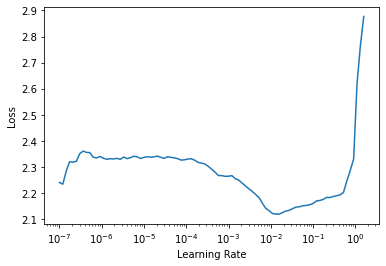

In [16]:
learn.lr_find()

In [17]:
cbs=[CSVLogger(fname='history_eduge_classification_nolm.csv')]

In [18]:
learn.fit(20, 0.001, cbs=cbs)

epoch,train_loss,valid_loss,accuracy,time
0,0.361861,0.321661,0.901474,09:48
1,0.261868,0.326333,0.898553,09:48
2,0.200290,0.289222,0.911964,09:50
3,0.146181,0.308601,0.911234,09:49
4,0.116426,0.338157,0.907383,09:48


epoch,train_loss,valid_loss,accuracy,time
0,0.361861,0.321661,0.901474,09:48
1,0.261868,0.326333,0.898553,09:48
2,0.200290,0.289222,0.911964,09:50
3,0.146181,0.308601,0.911234,09:49
4,0.116426,0.338157,0.907383,09:48
5,0.085573,0.350079,0.911167,09:47
6,0.082905,0.385397,0.901939,09:51
7,0.069337,0.371619,0.904594,09:49
8,0.050635,0.394026,0.905391,09:51
9,0.060210,0.386014,0.908445,09:49


KeyboardInterrupt: ignored

After 10 epochs we can see the accuracy settling around 91%. It seems we can't do better without a language model!

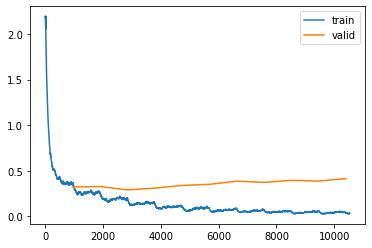

In [19]:
learn.recorder.plot_loss()